In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
path = "C:\\Users\\LBB_3\\OneDrive\\Desktop\\BScGroupProject_Files\\multimat\\newcode\\Patterns\\%s"

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin,cos,pi,exp

import voxelTable as vt
from voxelTable import * 
from patterns import line

## Zig Zag

In [5]:
size = [1,1,1]
mat = {'Vdepo':-0.67,'p2':7,'p3':-0.5}

In [25]:
voxels = voxelizeCurve(line(0,0,0.5, 0,0,10),size,**mat)
for i in range(0,5):
    zig = voxelizeCurve(line(0,0,20*i+10,  0,10,20*i+20),size,**mat)
    zag = voxelizeCurve(line(0,10,20*i+20,  0,0,20*i+30),size,**mat)
    voxels = merge(zig,voxels,zag)

In [33]:
help(vt)

Help on module voxelTable:

NAME
    voxelTable

DESCRIPTION
    Contains functions to work with a array - sometimes called table - of voxels. The underlying
    data type is a numpy array with custom type `dt`. Facilitates creation, modification and
    visualisation of voxel data. See quickStart.ipynp for a tutorial.

FUNCTIONS
    add(array, x=None, y=None, z=None, Vdepo=None, p1=None, p2=None, p3=None, p4=None)
        Adds to every voxel the specified value(s). If a value is not specified leave
        it untouched.
    
    copy(voxels)
        Returns a copy from a given voxel array.
    
    cubeFaces(voxel, size)
        Returns a numpy array of faces of a cuboid with its middle point of the top
        surface corresponding to the voxel location. The cuboid has the given size.
    
    finalize(voxels, size)
        Rasterizes, sorts and removes duplicated voxels. After finalize a voxel file should be stable to print.
    
    load(filename)
        Given a file returns a cor

In [30]:
voxels = finalize(voxels)
plotObject(voxels,size)

if True:
    save(voxels,path%'zigZag.csv')

TypeError: finalize() missing 1 required positional argument: 'size'

Voxels printed: 53. Faces printed: 318. Lines drawn: 636.

xmax=7.25, xmin=-0.25, ymax=0.25, ymin=-0.25, zmax=10.0, zmin=0.25
maxRange=9.75, xRange=7.5, yRange=0.5, zRange=9.75
xCenter=3.5, yCenter=0.0, zCenter=5.125

colorValues used for this plot:
{'(-0.67, 0.0, 7.0, 0.0, 0.0)': [0.341, 0.447, 0.051]} 
None


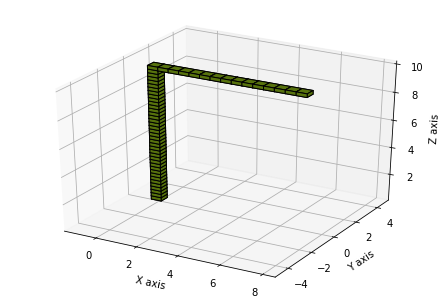

Show plot
Plotting used 0.274621 seconds.


In [4]:
size = [0.5,0.5,0.25]
mat = {'Vdepo':-0.67,'p2':7}

up = vt.voxelizeCurve(line(0,0,0.5,  0,0,10),size,**mat)
accross = vt.voxelizeCurve(line(0,0,10,  7,0,10),size,**mat)
voxels = vt.merge(up,accross)

voxels = vt.finalize(voxels,size)
vt.plotObject(voxels,size,info=True)
if False:
    vt.save(voxels,path%'3.2_pressureon.csv')

In [5]:
#Arrow of pillars with different voxel sizes:
mat = {'Vdepo':-0.67,'p2':7}
p1 = voxelizeCurve(line( 0,80,0.15,  0,80,10), [1,1,0.15], **mat)
p2 = voxelizeCurve(line( 0,40, 0.2,  0,40,10), [1,1, 0.2], **mat)
p3 = voxelizeCurve(line( 0, 0,0.25,  0, 0,10), [1,1,0.25], **mat)
p4 = voxelizeCurve(line(40,40,0.35, 40,40,10), [1,1,0.35], **mat)
p5 = voxelizeCurve(line(40, 0,0.45, 40, 0,10), [1,1,0.45], **mat)
p6 = voxelizeCurve(line(80, 0,0.55, 80, 0,10), [1,1,0.55], **mat)
p7 = voxelizeCurve(line(80,80,0.65, 80,80,10), [1,1,0.65], **mat)

voxels = merge(p1,p2,p3,p4,p5,p6,p7)
voxels = sort(voxels)
#plotObject(voxels,[4,4,1])
#print(voxels[0:10])
if False:
    save(voxels,path%'2_voxelsizes_new')

In [11]:
#Finalise existing csv file to the desired z resolution
#helix = load('/home/andrino/eth/multimat/newcode/Patterns/16.06/6_2HelixVerylarge.csv')
helix = load(path%'2HelixVerylarge - Copie.csv')
new = finalize(helix,[1,1,0.35])
print('Before: %s voxels. After: %s voxels'%(len(helix),len(new)))
if False:
    save(new,path%'6_2HelixVerylarge_Rasterized_350nmZres.csv')

Before: 1404 voxels. After: 778 voxels


Voxels printed: 1404. Faces printed: 8424. Lines drawn: 16848.

xmax=68.5, xmin=27.5, ymax=68.5, ymin=27.5, zmax=70.0, zmin=-0.35
maxRange=70.35, xRange=41.0, yRange=41.0, zRange=70.35
xCenter=48.0, yCenter=48.0, zCenter=34.824999999999996

colorValues used for this plot:
{'(-0.67, 0.0, 5.0, 0.0, 0.0)': [0.627, 0.631, 0.545]} 
None


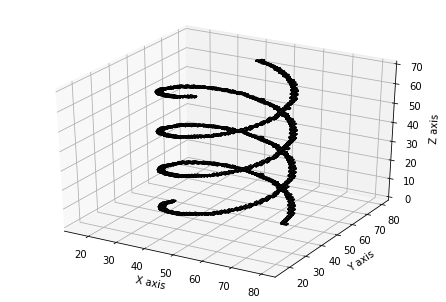

Show plot
Plotting used 1.326946 seconds.


In [13]:
plotObject(helix,[1,1,0.35],info=True)

In [8]:
#Sky scraper
mat = {'Vdepo':-0.67,'p2':7}

p1 = voxelizeCurve(line( 0,0,0.5,  0,0,70), [1,1,0.25], **mat)
voxels = finalize(p1,[1,1,0.25])

if False:
    save(new,path%'8_SkyScraper.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/andrino/eth/multimat/newcode/Patterns/16.06/8_SkyScraper.csv'

In [1]:
size=[0.3,0.3,0.3]
voxels = voxelizeSet(plane(2,0,0, 0,0,0, 0,0,3,invert=False),cuboid=[-2,2,-2,2,-2,2],size=size,**mat)
plotObject(voxels,size=size,info=True)

NameError: name 'voxelizeSet' is not defined

# actually printed Bike

In [2]:
size = [0.5,0.5,0.35]
mat = {'Vdepo':-2,'p2':5}

saddleCuboid=[-15,15,-15,15,0,2]
def saddle(x,y,z):
    return (x**2 + y**2 < 5**2)

#parametrization of the handle bars
def bathTub(t):
    return 1 / (1 + exp(-40*abs(t-0.5)+10))

def handleBars(t):
    x = 15*sin(pi*t)
    y = 15*cos(pi*t)
    z = 7*bathTub(t)
    return [x,y,z]

def pipe(x,y,z):
    radius = 15
    thick = 2
    r2 = x**2 + z**2 # circle equation
    return (radius-thick/2)**2 <= r2 and r2 <= (radius+thick/2)**2

# create Wheels and move them to position
cuboid = [-30,30,0,1,-30,30]
backWheel = voxelizeSet(pipe,size,cuboid,**mat)
frontWheel = copy(backWheel)
add(backWheel,x=25,y=0,z=10)
add(frontWheel,x=75,y=0,z=10)

# create the Frame
frameBottom = voxelizeCurve(line(35,0,20, 75,0,37),size,**mat)
frameBottom = merge(add(copy(frameBottom),y=size[1]),frameBottom)
frameBottom = merge(add(copy(frameBottom),z=size[2]),frameBottom)
frameTop = voxelizeCurve(line(25,0,35, 75,0,47),size,**mat)
frameTop = merge(add(copy(frameTop),y=size[1]),frameTop)
frameTop = merge(add(copy(frameTop),z=size[2]),frameTop)
frameRear = voxelizeCurve(line(25,0,25, 25,0,50),size,**mat)
frameFront = voxelizeCurve(line(75,0,25, 75,0,50),size,**mat)


# handleBars
handleBars = voxelizeCurve(handleBars,size,**mat)
add(handleBars,60,0,50)
handleBarsFat = copy(handleBars)
add(handleBarsFat,z=size[2]) # add a second handle bar on top of the first one to make it thicker
handleBars = merge(handleBars, handleBarsFat)

handleBarsFat2 = copy(handleBars)
add(handleBarsFat2,x=size[0],z=size[2])
handleBars = merge(handleBars, handleBarsFat2)
saddle = voxelizeSet(saddle,size,saddleCuboid,**mat)

# saddle
saddle = add(saddle,26,0,50)
voxels = merge(frontWheel,backWheel,frameBottom,frameTop,frameRear,frameFront,handleBars,saddle)

# set z a starting height
voxels = moveBeyond(voxels,z=0.5)
voxels = finalize(voxels,size)
c = {'(-0.024, 0.0, 7.0, 0.0, 0.0)': [0.796, 0.714, 0.459]}
plotObject(voxels,size,info = True,colorDict=c)


if False:
    save(voxels,path%'comftyBikeScalledLight.csv')

NameError: name 'voxelizeSet' is not defined